# Detecting edges

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters

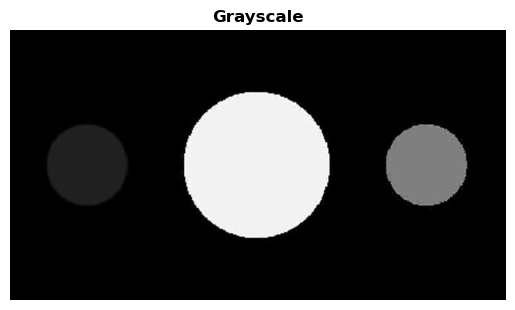

In [2]:
circles = cv2.imread("./images/circles.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(circles, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

We can locate the edges of well-defined objects in a grayscale image by calling the [sobel()](https://scikit-image.org/docs/stable/api/skimage.filters.html#sobel) function and applying a [threshold](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57).

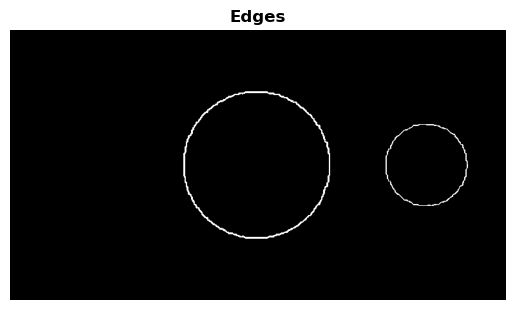

In [3]:
circles_edge = filters.sobel(circles)
circles_edge = circles_edge / circles_edge.max() * 255
thresh, circles_edge = cv2.threshold(circles_edge.astype(np.uint8), 127, 255, cv2.THRESH_OTSU)

plt.imshow(circles_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()

The edges of two circles were identified, but the boundary of the third faint circle was missed due to low contrast. We can lower the detection threshold to capture the boundary of the third circle.

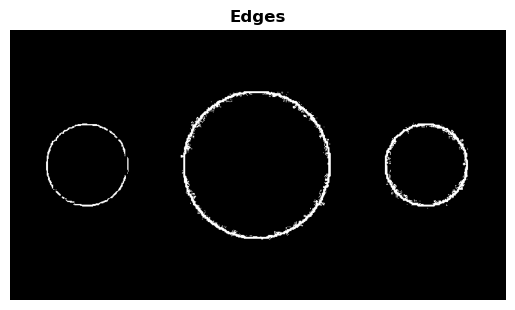

In [4]:
circles_edge = filters.sobel(circles)
circles_edge = circles_edge / circles_edge.max() * 255
_, circles_edge = cv2.threshold(circles_edge.astype(np.uint8), thresh * 0.15, 255, cv2.THRESH_BINARY)

plt.imshow(circles_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()

The edges of the third circle were found but are a bit broken up. Another way to tune the detection is to select a different edge detection algorithm.

In [9]:
def LoG_edge_detection(image, laplacian_ksize):
    # Remove noise by blurring with a Gaussian filter
    image = cv2.GaussianBlur(image, (3, 3), 0)

    # Apply Laplace function
    image = cv2.Laplacian(image, ddepth=cv2.CV_16S, ksize=laplacian_ksize)

    # Converting back to uint8
    image = cv2.convertScaleAbs(image)

    # Image Thresholding
    _, image = cv2.threshold(circles_edge, 127, 255, cv2.THRESH_OTSU)

    return image

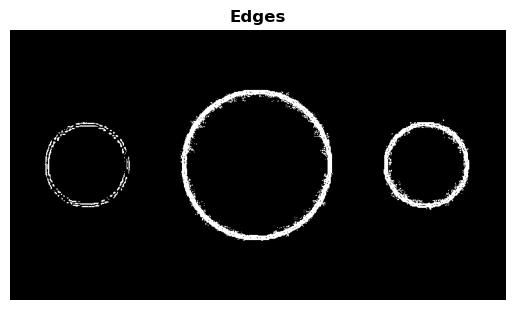

In [12]:
circles_edge = LoG_edge_detection(circles, 5)

plt.imshow(circles_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()